In [18]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
# norm's datas acquisition

dati_FTCS = np.loadtxt("l2norm_FTCS.dat",dtype="str")
dati_LF = np.loadtxt("l2norm_LAX.dat",dtype="str")
dati_lf = np.loadtxt("l2norm_LEAPFROG.dat",dtype="str")
dati_LW = np.loadtxt("l2norm_LAXWENDROFF.dat",dtype="str")

tmFTCS = []
tmLF = []
tmlf = []
tmLW = []
l2nFTCS = []
l2nLF = []
l2nlf = []
l2nLW = []
for i in range(len(dati_FTCS[:,0])-1):
    tmFTCS.append(float(dati_FTCS[i+1,0]))
    l2nFTCS.append(float(dati_FTCS[i+1,1]))
for i in range(len(dati_LF[:,0])-1):
    tmLF.append(float(dati_LF[i+1,0]))
    l2nLF.append(float(dati_LF[i+1,1]))
for i in range(len(dati_lf[:,0])-1):
    tmlf.append(float(dati_lf[i+1,0]))
    l2nlf.append(float(dati_lf[i+1,1]))
for i in range(len(dati_LW[:,0])-1):
    tmLW.append(float(dati_LW[i+1,0]))
    l2nLW.append(float(dati_LW[i+1,1]))
tm = []
tm.append(tmFTCS)
tm.append(tmLF)
tm.append(tmlf)
tm.append(tmLW)
norm = []
norm.append(l2nFTCS)
norm.append(l2nLF)
norm.append(l2nlf)
norm.append(l2nLW)

print(len(tm),len(norm))

4 4


In [29]:
import os

print(os.getcwd())

os.makedirs('./imma')      # CREATES THE DIRECTORY "immagini"

#os.listdir('./')

/home/matteo/Numerical_Rel


In [30]:
N=101                      #defining the grid
dx=10/(N-1)
t_final=20
print(t_final/dx)
m = 250
Cf = t_final/dx/m
Cf                     

200.0


0.8

In [31]:
# SPACE
N = 101      # number of space points
L = 10
dx = L/(N-1)
x0 = 5
x = np.linspace(0,L,N)
u_initial = np.zeros(len(x))
for i in range(len(x)):
    u_initial[i] = np.exp(-(x[i]-x0)**2)          # initial function

print('Space points =',len(x),'\ndx =',dx)

# TIME
t_final = 20.     # final time
cf = 0.5   # Courant factor
a = 1.
dt = round(cf*dx/a,5)                               
Nt = int(t_final/dt + 1)  # number of time intervals
print('Time points =',Nt,'\ndt =',dt)
print(t_final/dt)


Space points = 101 
dx = 0.1
Time points = 401 
dt = 0.05
400.0


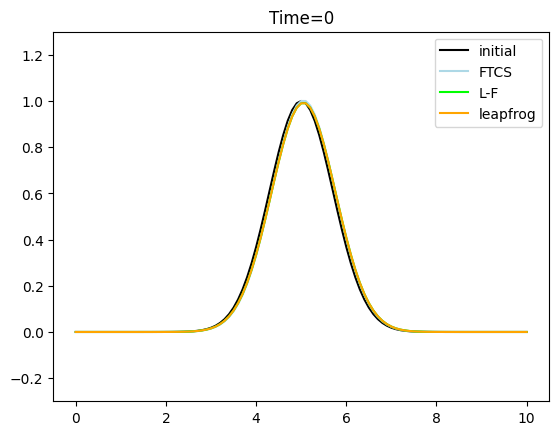

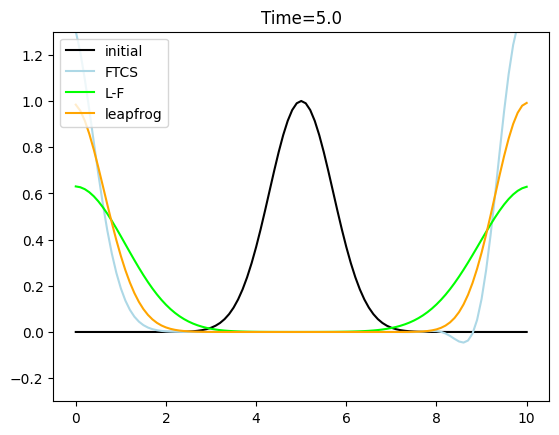

/tmp/ipykernel_70/690904375.py:39: RuntimeWarning: overflow encountered in square
  L2norm[i][j] = np.sqrt(np.sum(u_current[i]**2)/len(u_current[i]))


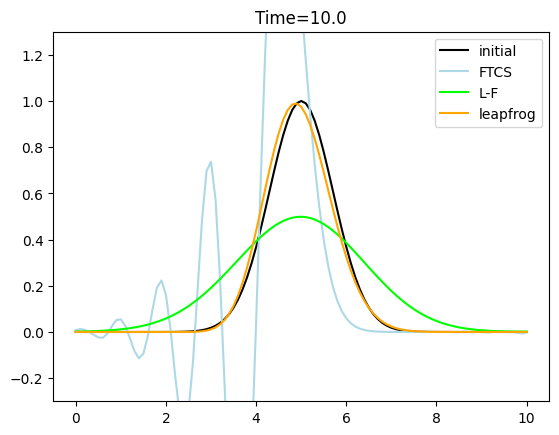

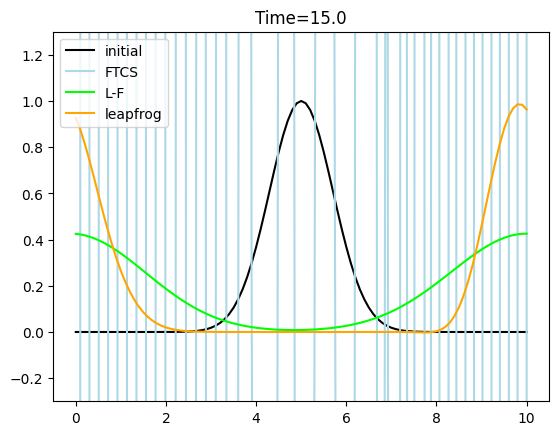

/tmp/ipykernel_70/690904375.py:35: RuntimeWarning: overflow encountered in subtract
  u_next[3] = u_current[3] - a*dt/(2*dx)*(np.roll(u_current[3],-1) - np.roll(u_current[3],+1)) + 2*(a*dt/(2*dx)**2)*(np.roll(u_current[3],-1) + np.roll(u_current[3],+1) - 2*u_current[3])
/tmp/ipykernel_70/690904375.py:35: RuntimeWarning: overflow encountered in multiply
  u_next[3] = u_current[3] - a*dt/(2*dx)*(np.roll(u_current[3],-1) - np.roll(u_current[3],+1)) + 2*(a*dt/(2*dx)**2)*(np.roll(u_current[3],-1) + np.roll(u_current[3],+1) - 2*u_current[3])
/tmp/ipykernel_70/690904375.py:35: RuntimeWarning: invalid value encountered in subtract
  u_next[3] = u_current[3] - a*dt/(2*dx)*(np.roll(u_current[3],-1) - np.roll(u_current[3],+1)) + 2*(a*dt/(2*dx)**2)*(np.roll(u_current[3],-1) + np.roll(u_current[3],+1) - 2*u_current[3])
/tmp/ipykernel_70/690904375.py:35: RuntimeWarning: overflow encountered in add
  u_next[3] = u_current[3] - a*dt/(2*dx)*(np.roll(u_current[3],-1) - np.roll(u_current[3],+1)) + 2*(a*d

400


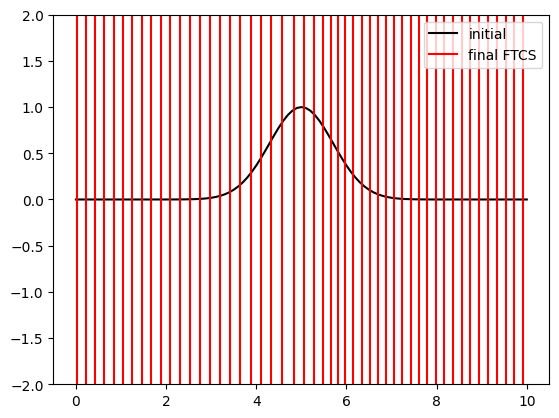

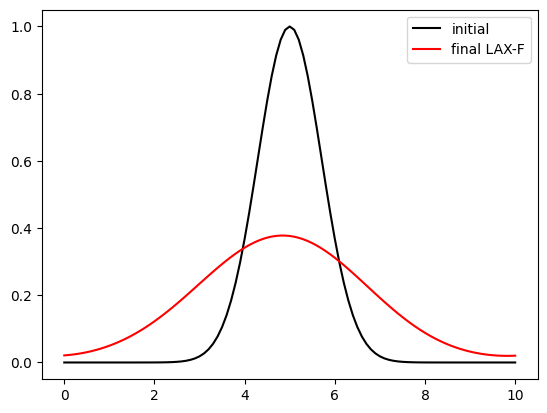

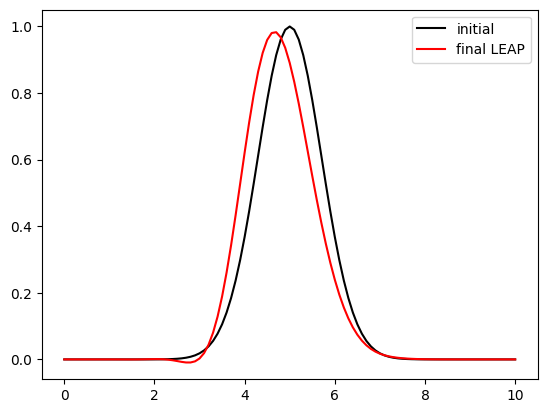

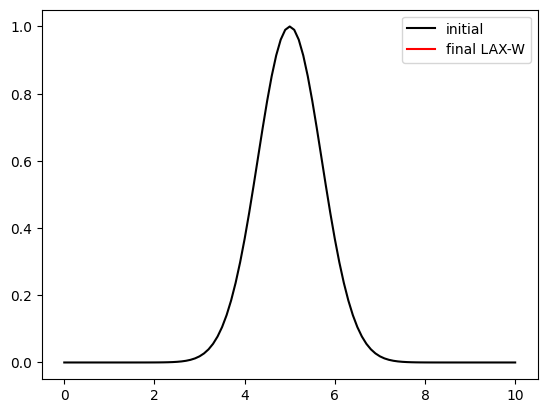

In [32]:
# EVOLUTION
u_current = np.zeros((4,len(u_initial)))
L2norm = np.zeros((4,int(t_final/dt)+1))

for i in range(4):
    u_current[i] = u_initial.copy()
    L2norm[i][0] = np.sqrt(np.sum(u_current[i]**2)/len(u_current[i]))
u_next = u_current.copy()

# only for leapfrog
u_previous = u_initial.copy()

time = []
time.append(0)
t = 0
j = 0
k = 0

while t<t_final:
    j+=1
    # FTCS
    u_next[0] = u_current[0] - a*dt/(2*dx)*(np.roll(u_current[0],-1) - np.roll(u_current[0],+1)) 
    
    # Lax-Friedrichs
    u_next[1] = 0.5*(np.roll(u_current[1],-1) + np.roll(u_current[1],+1)) - a*dt/(2*dx)*(np.roll(u_current[1],-1) - np.roll(u_current[1],+1))  
    
    # leapfrog
    if t==0:
        u_next[2] = 0.5*(np.roll(u_current[2],-1) + np.roll(u_current[2],+1)) - a*dt/(2*dx)*(np.roll(u_current[2], -1) - np.roll(u_current[2],+1))
    else:
        u_next[2] = u_previous - 2*a*dt/(2*dx)*(np.roll(u_current[2],-1) - np.roll(u_current[2],+1)) 
        u_previous = u_current[2].copy()  

    # Lax-Wendroff
    u_next[3] = u_current[3] - a*dt/(2*dx)*(np.roll(u_current[3],-1) - np.roll(u_current[3],+1)) + 2*(a*dt/(2*dx)**2)*(np.roll(u_current[3],-1) + np.roll(u_current[3],+1) - 2*u_current[3]) 
    
    for i in range(4):
        u_current[i] = u_next[i].copy()
        L2norm[i][j] = np.sqrt(np.sum(u_current[i]**2)/len(u_current[i]))
    
    if (j-1)%100==0:             
        k+=1
        plt.plot(x, u_initial, color='k',label='initial')        
        plt.plot(x, u_current[0],color='lightblue',label='FTCS')
        plt.plot(x, u_current[1],color='lime',label='L-F')
        plt.plot(x, u_current[2],color='orange',label='leapfrog')
        #plt.plot(x, u_current[3],color='yellow',linestyle='--', linewidth=1.2, label='L-W')  #per qualche motivo non va più
        plt.title('Time='+str(round(t,2)))
        plt.legend()
        plt.ylim(-0.3,1.3)
        plt.savefig('./imma/fig_'+str(j).zfill(5)+'.png', dpi=200)
        #plt.close()
        #plt.savefig('1_time_'+str(k)+'.png',dpi=150)
        plt.show()

    t = t+dt
    time.append(t)
print(j)

'''   
k+=1
plt.plot(x, u_initial, color='k',label='initial')
plt.plot(x, u_current[0],color='lightblue',label='FTCS')
plt.plot(x, u_current[1],color='g',label='LAX-F')
plt.plot(x, u_current[2],color='b',label='LEAP')
plt.plot(x, u_current[3],color='r', linestyle='--', linewidth=1.2, label='LAX-W')
plt.title('Time='+str(round(t,1))+'  Cf='+str(cf))
plt.ylim(-0.3,1.3)
plt.legend()
#plt.savefig('./Homework_1/images/1_cf'+str(cf)+'.png',dpi=150)
plt.show()
'''      
        
methods = ['FTCS','LAX-F','LEAP','LAX-W']
for i in range(4):
    plt.plot(x,u_initial,color='k',label='initial')
    plt.plot(x,u_current[i],color='r',label='final '+methods[i])
    if i==0:
        plt.ylim(-2,2)
    plt.legend()
    #plt.savefig('Final_cf1'+methods[i]+'.png',dpi=150)
    plt.show()

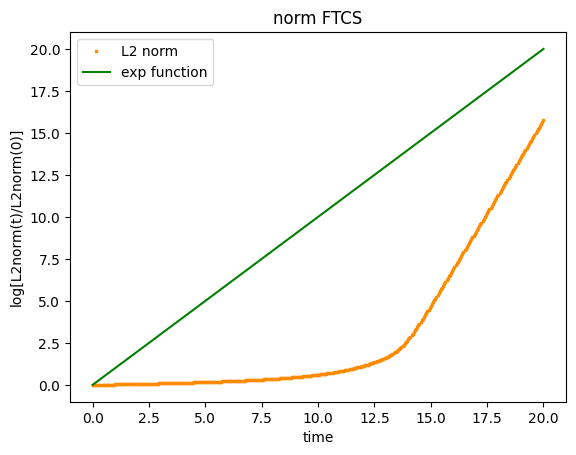

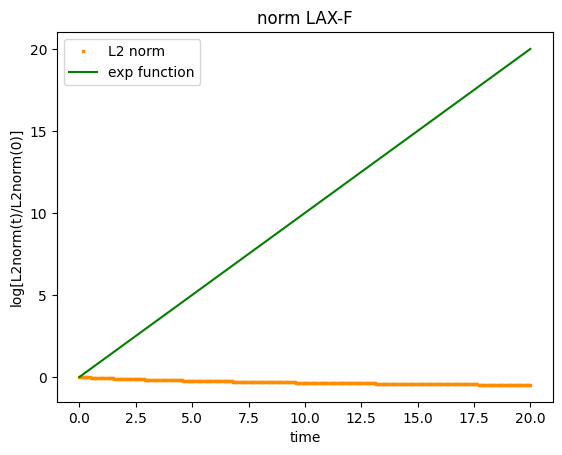

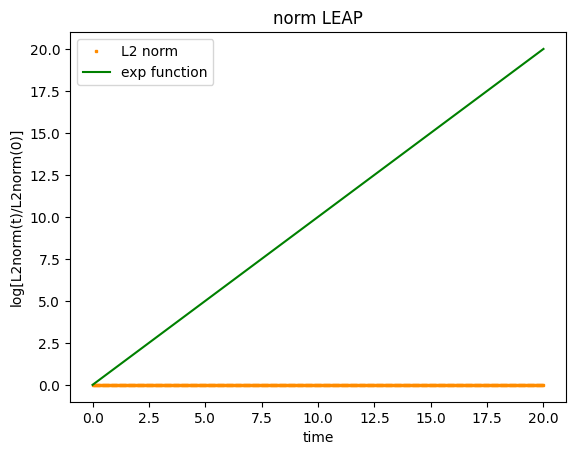

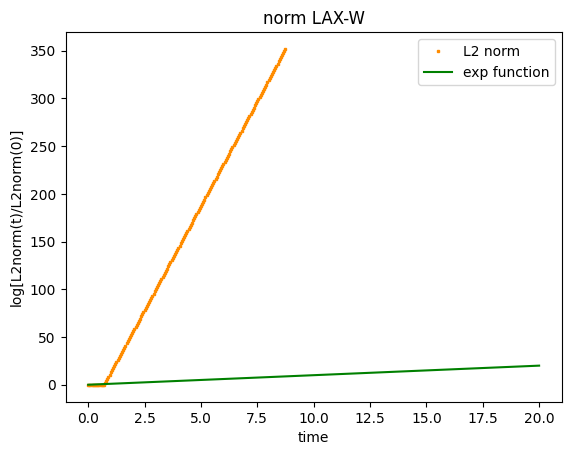

In [7]:
for i in range(4):                            #per qualche motivo Lax W non funziona più ma per fortuna l'avevo salvato quando funzionava.
    plt.plot(time,np.log(L2norm[i,:]/L2norm[i,0]),'s',color='darkorange', markersize=2,label='L2 norm')
    plt.plot(time,time,color='green',label='exp function')
    plt.xlabel('time')
    plt.ylabel('log[L2norm(t)/L2norm(0)]')
    plt.legend()
    plt.title('norm '+methods[i])
    #plt.savefig('norm_cf1'+methods[i]+'.png')
    plt.show()

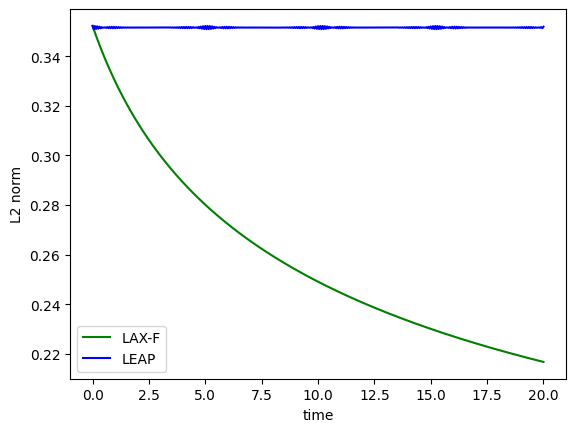

In [9]:
colors = ['y','g','b','r']           
for i in range(1,3):
    plt.plot(time,L2norm[i,:], color=colors[i], label=methods[i])
    plt.xlabel('time')
    plt.ylabel('L2 norm')
plt.legend()
#plt.savefig('norm_compare_cf1.png')
plt.show()

CHANGING Cf

/tmp/ipykernel_70/1877519794.py:47: RuntimeWarning: overflow encountered in square
  L2norm[i][j] = np.sqrt(np.sum(u_current[i]**2)/len(u_current[i]))
/tmp/ipykernel_70/1877519794.py:43: RuntimeWarning: overflow encountered in add
  u_next[3] = u_current[3] - a*dt/(2*dx)*(np.roll(u_current[3],-1) - np.roll(u_current[3],+1)) + 2*(a*dt/(2*dx)**2)*(np.roll(u_current[3],-1) + np.roll(u_current[3],+1) - 2*u_current[3])
/tmp/ipykernel_70/1877519794.py:43: RuntimeWarning: overflow encountered in multiply
  u_next[3] = u_current[3] - a*dt/(2*dx)*(np.roll(u_current[3],-1) - np.roll(u_current[3],+1)) + 2*(a*dt/(2*dx)**2)*(np.roll(u_current[3],-1) + np.roll(u_current[3],+1) - 2*u_current[3])
/tmp/ipykernel_70/1877519794.py:43: RuntimeWarning: overflow encountered in subtract
  u_next[3] = u_current[3] - a*dt/(2*dx)*(np.roll(u_current[3],-1) - np.roll(u_current[3],+1)) + 2*(a*dt/(2*dx)**2)*(np.roll(u_current[3],-1) + np.roll(u_current[3],+1) - 2*u_current[3])
/tmp/ipykernel_70/1877519794.py:43: Ru

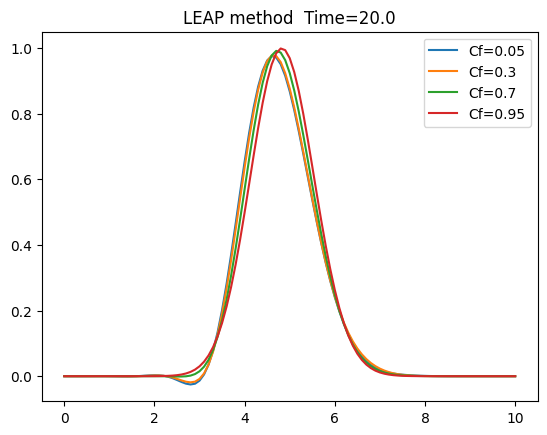

In [14]:
# EVOLUTION
#plt.plot(x,u_initial,color='k',label='initial')

CF = [0.05,0.3,0.7,0.95]
for cf in CF:
    a = 1
    dt = cf*dx/a

    u_current = np.zeros((4,len(u_initial)))
    L2norm = np.zeros((4,int(t_final/dt)+2))

    for i in range(4):
        u_current[i] = u_initial.copy()
        L2norm[i][0] = np.sqrt(np.sum(u_current[i]**2)/len(u_current[i]))
    u_next = u_current.copy()
    

    # only for leapfrog
    u_previous = u_initial.copy()

    time = []
    time.append(0)
    t = 0
    j = 0
    k = 0

    while t<t_final:
        j+=1
        # FTCS
        u_next[0] = u_current[0] - a*dt/(2*dx)*(np.roll(u_current[0],-1) - np.roll(u_current[0],+1)) 
    
    # Lax-Friedrichs
        u_next[1] = 0.5*(np.roll(u_current[1],-1) + np.roll(u_current[1],+1)) - a*dt/(2*dx)*(np.roll(u_current[1],-1) - np.roll(u_current[1],+1))  
    
    # leapfrog
        if t==0:
            u_next[2] = 0.5*(np.roll(u_current[2],-1) + np.roll(u_current[2],+1)) - a*dt/(2*dx)*(np.roll(u_current[2], -1) - np.roll(u_current[2],+1))
        else:
            u_next[2] = u_previous - 2*a*dt/(2*dx)*(np.roll(u_current[2],-1) - np.roll(u_current[2],+1)) 
            u_previous = u_current[2].copy()  

    # Lax-Wendroff
            u_next[3] = u_current[3] - a*dt/(2*dx)*(np.roll(u_current[3],-1) - np.roll(u_current[3],+1)) + 2*(a*dt/(2*dx)**2)*(np.roll(u_current[3],-1) + np.roll(u_current[3],+1) - 2*u_current[3]) 
    
        for i in range(4):
            u_current[i] = u_next[i].copy()
            L2norm[i][j] = np.sqrt(np.sum(u_current[i]**2)/len(u_current[i]))

        if (j-1)%50==60:
            k+=1
            plt.plot(x, u_current[0],color='c',label='FTCS')
            plt.plot(x, u_current[1],color='g',label='L-F')
            plt.plot(x, u_current[2],color='b',label='leapfrog')
            plt.plot(x, u_current[3],color='r',linestyle='--', linewidth=1.2, label='L-W')
            plt.title('Time='+str(round(t,2)))
            #plt.legend()
            plt.ylim(-0.3,1.3)
            #plt.savefig('./frames/fig_'+str(j).zfill(5)+'.png', dpi=200)
            #plt.close()
            #plt.savefig('./Homework_1/images/1_time_'+str(k)+'.png',dpi=150)
            plt.show()

        t = t+dt
        time.append(t)
     
    '''
    print(j)
    k+=1
    plt.plot(x, u_initial, color='k',label='initial')
    plt.plot(x, u_current[0],color='lightblue',label='FTCS')
    plt.plot(x, u_current[1],color='g',label='LAX-F')
    plt.plot(x, u_current[2],color='b',label='LEAP')
    plt.plot(x, u_current[3],color='r', linestyle='--', linewidth=1.2, label='LAX-W')
    plt.title('Time='+str(round(t,1))+'  Cf='+str(cf))
    plt.ylim(-0.3,1.3)
    plt.legend()
    #plt.savefig('Finals_cf'+str(cf)+'.png',dpi=150)
    plt.show()
    '''
   
           
    methods = ['FTCS','LAX-F','LEAP','LAX-W']
    i = 2
    plt.plot(x,u_current[i],label='Cf='+str(cf))
    #plt.plot(time,L2norm[i],label='Cf='+str(cf))
    if i==0:
        plt.ylim(-2,2)
    plt.legend()
    plt.title(str(methods[i])+' method  Time=20.0')               #?
    #plt.savefig('norm_cf_var'+methods[i]+'.png',dpi=150)
plt.show()

CHANGING J

/tmp/ipykernel_70/3339882539.py:57: RuntimeWarning: overflow encountered in subtract
  u_next[3] = u_current[3] - a*dt/(2*dx)*(np.roll(u_current[3],-1) - np.roll(u_current[3],+1)) + 2*(a*dt/(2*dx)**2)*(np.roll(u_current[3],-1) + np.roll(u_current[3],+1) - 2*u_current[3])
/tmp/ipykernel_70/3339882539.py:57: RuntimeWarning: overflow encountered in multiply
  u_next[3] = u_current[3] - a*dt/(2*dx)*(np.roll(u_current[3],-1) - np.roll(u_current[3],+1)) + 2*(a*dt/(2*dx)**2)*(np.roll(u_current[3],-1) + np.roll(u_current[3],+1) - 2*u_current[3])
/tmp/ipykernel_70/3339882539.py:57: RuntimeWarning: invalid value encountered in subtract
  u_next[3] = u_current[3] - a*dt/(2*dx)*(np.roll(u_current[3],-1) - np.roll(u_current[3],+1)) + 2*(a*dt/(2*dx)**2)*(np.roll(u_current[3],-1) + np.roll(u_current[3],+1) - 2*u_current[3])
/tmp/ipykernel_70/3339882539.py:57: RuntimeWarning: overflow encountered in add
  u_next[3] = u_current[3] - a*dt/(2*dx)*(np.roll(u_current[3],-1) - np.roll(u_current[3],+1)) + 2*

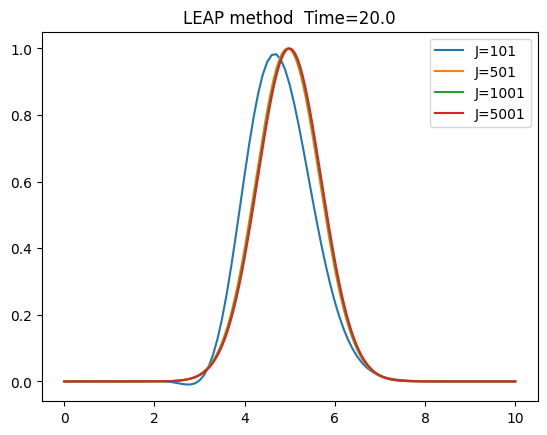

In [15]:
#plt.plot(x,u_initial,color='lightblue',label='initial')

J = [101,501,1001,5001]            
for N in J:
    
    # SPACE
    L = 10
    dx = L/(N-1)
    x0 = 5
    x = np.linspace(0,L,N)
    u_initial = np.zeros(len(x))
    for i in range(len(x)):
        u_initial[i] = np.exp(-(x[i]-x0)**2)          # initial function
        
    # TIME
    t_final = 20.     # final time
    cf = 0.5   # Courant factor
    a = 1.
    dt = round(cf*dx/a,5)                               
    Nt = int(t_final/dt + 1)  # number of time intervals
    

    # EVOLUTION
    u_current = np.zeros((4,len(u_initial)))
    L2norm = np.zeros((4,int(t_final/dt)+1))

    for i in range(4):
        u_current[i] = u_initial.copy()
        L2norm[i][0] = np.sqrt(np.sum(u_current[i]**2)/len(u_current[i]))
    u_next = u_current.copy()

    # only for leapfrog
    u_previous = u_initial.copy()

    time = []
    time.append(0)
    t = 0
    j = 0
    k = 0

    while t<t_final:
        j+=1
        # FTCS
        u_next[0] = u_current[0] - a*dt/(2*dx)*(np.roll(u_current[0],-1) - np.roll(u_current[0],+1)) 
    
    # Lax-Friedrichs
        u_next[1] = 0.5*(np.roll(u_current[1],-1) + np.roll(u_current[1],+1)) - a*dt/(2*dx)*(np.roll(u_current[1],-1) - np.roll(u_current[1],+1))  
    
    # leapfrog
        if t==0:
            u_next[2] = 0.5*(np.roll(u_current[2],-1) + np.roll(u_current[2],+1)) - a*dt/(2*dx)*(np.roll(u_current[2], -1) - np.roll(u_current[2],+1))
        else:
            u_next[2] = u_previous - 2*a*dt/(2*dx)*(np.roll(u_current[2],-1) - np.roll(u_current[2],+1)) 
            u_previous = u_current[2].copy()  

    # Lax-Wendroff
        u_next[3] = u_current[3] - a*dt/(2*dx)*(np.roll(u_current[3],-1) - np.roll(u_current[3],+1)) + 2*(a*dt/(2*dx)**2)*(np.roll(u_current[3],-1) + np.roll(u_current[3],+1) - 2*u_current[3]) 
    
        for i in range(4):
            u_current[i] = u_next[i].copy()
           # L2norm[i][j] = np.sqrt(np.sum(u_current[i]**2)/len(u_current[i]))

        if (j-1)%50==60:
            k+=1
            plt.plot(x, u_current[0],color='k',label='FTCS')
            plt.plot(x, u_current[1],color='green',label='L-F')
            plt.plot(x, u_current[2],color='navy',label='leapfrog')
            plt.plot(x, u_current[3],color='darkorange',linestyle='--', linewidth=1.2, label='L-W')
            plt.title('Time='+str(round(t,2)))
            #plt.legend()
            plt.ylim(-0.3,1.3)
            #plt.savefig('./frames/fig_'+str(j).zfill(5)+'.png', dpi=200)
            #plt.close()
            #plt.savefig('./Homework_1/images/1_time_'+str(k)+'.png',dpi=150)
            plt.show()

        t = t+dt
        time.append(t)
    '''  
    print(j)
    k+=1
    plt.plot(x, u_initial, color='lightblue',label='initial')
    plt.plot(x, u_current[0],color='y',label='FTCS')
    plt.plot(x, u_current[1],color='g',label='L-F')
    plt.plot(x, u_current[2],color='b',label='leapfrog')
    plt.plot(x, u_current[3],color='r', linestyle='--', linewidth=1.2, label='L-W')
    plt.title('Time='+str(round(t,1))+'  Cf='+str(cf))
    plt.ylim(-0.3,1.3)
    plt.legend()
    #plt.savefig('./Homework_1/images/1_cf'+str(cf)+'.png',dpi=150)
    plt.show()
    '''
            
    methods = ['FTCS','LAX-F','LEAP','LAX-W']
    i = 2
    plt.plot(x,u_current[i],label='J='+str(N))
    if i==0:
        plt.ylim(-2,2)
    plt.legend()
    plt.title(str(methods[i])+' method  Time=20.0')
#plt.savefig('Final_var_J_'+methods[i]+'.png',dpi=150)
plt.show()

/tmp/ipykernel_70/2196343078.py:60: RuntimeWarning: overflow encountered in multiply
  u_next[3] = u_current[3] - a*dt/(2*dx)*(np.roll(u_current[3],-1) - np.roll(u_current[3],+1)) + 2*(a*dt/(2*dx)**2)*(np.roll(u_current[3],-1) + np.roll(u_current[3],+1) - 2*u_current[3])
/tmp/ipykernel_70/2196343078.py:60: RuntimeWarning: invalid value encountered in subtract
  u_next[3] = u_current[3] - a*dt/(2*dx)*(np.roll(u_current[3],-1) - np.roll(u_current[3],+1)) + 2*(a*dt/(2*dx)**2)*(np.roll(u_current[3],-1) + np.roll(u_current[3],+1) - 2*u_current[3])
/tmp/ipykernel_70/2196343078.py:60: RuntimeWarning: overflow encountered in add
  u_next[3] = u_current[3] - a*dt/(2*dx)*(np.roll(u_current[3],-1) - np.roll(u_current[3],+1)) + 2*(a*dt/(2*dx)**2)*(np.roll(u_current[3],-1) + np.roll(u_current[3],+1) - 2*u_current[3])
/tmp/ipykernel_70/2196343078.py:60: RuntimeWarning: overflow encountered in subtract
  u_next[3] = u_current[3] - a*dt/(2*dx)*(np.roll(u_current[3],-1) - np.roll(u_current[3],+1)) + 2*

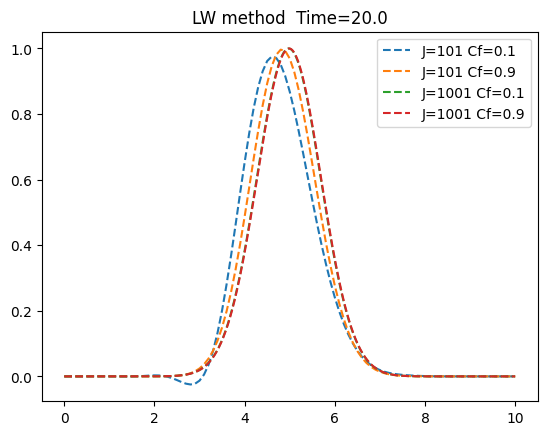

In [16]:
#Changing both

J = [101,1001]
CF = [0.1,0.9]
for N in J:
    for cf in CF:
        # SPACE
        L = 10
        dx = L/(N-1)
        x0 = 5
        x = np.linspace(0,L,N)
        u_initial = np.zeros(len(x))
        for i in range(len(x)):
            u_initial[i] = np.exp(-(x[i]-x0)**2)          # initial function

       
        # TIME
        t_final = 20.     # final time
        #cf = 0.5   # Courant factor
        a = 1.
        dt = round(cf*dx/a,5)                               
        Nt = int(t_final/dt + 1)  # number of time intervals

        # EVOLUTION
        u_current = np.zeros((4,len(u_initial)))
        L2norm = np.zeros((4,int(t_final/dt)+1))
        normaa=[]
        

        for i in range(4):
            u_current[i] = u_initial.copy()
            L2norm[i][0] = np.sqrt(np.sum(u_current[i]**2)/len(u_current[i]))
        u_next = u_current.copy()
        
        normaa.append(np.sqrt(np.sum(u_current[1]**2)/len(u_current[1])))

        # only for leapfrog
        u_previous = u_initial.copy()

        time = []
        time.append(0)
        t = 0
        j = 0
        k = 0

        while t<t_final:
            j+=1
            # FTCS
            u_next[0] = u_current[0] - a*dt/(2*dx)*(np.roll(u_current[0],-1) - np.roll(u_current[0],+1)) 

            # Lax-Friedrichs
            u_next[1] = 0.5*(np.roll(u_current[1],-1) + np.roll(u_current[1],+1)) - a*dt/(2*dx)*(np.roll(u_current[1],-1) - np.roll(u_current[1],+1))  

            # leapfrog
            if t==0:
                u_next[2] = 0.5*(np.roll(u_current[2],-1) + np.roll(u_current[2],+1)) - a*dt/(2*dx)*(np.roll(u_current[2], -1) - np.roll(u_current[2],+1))
            else:
                u_next[2] = u_previous - 2*a*dt/(2*dx)*(np.roll(u_current[2],-1) - np.roll(u_current[2],+1)) 
                u_previous = u_current[2].copy()  

            # Lax-Wendroff
            u_next[3] = u_current[3] - a*dt/(2*dx)*(np.roll(u_current[3],-1) - np.roll(u_current[3],+1)) + 2*(a*dt/(2*dx)**2)*(np.roll(u_current[3],-1) + np.roll(u_current[3],+1) - 2*u_current[3]) 

            for i in range(4):
                u_current[i] = u_next[i].copy()
                #L2norm[i][j] = np.sqrt(np.sum(u_current[i]**2)/len(u_current[i]))
                if i ==1:
                    normaa.append(np.sqrt(np.sum(u_current[i]**2)/len(u_current[i])))
                    

            if (j-1)%50==60:
                k+=1
                plt.plot(x, u_current[0],color='y',label='FTCS')
                plt.plot(x, u_current[1],color='g',label='L-F')
                plt.plot(x, u_current[2],color='b',label='leapfrog')
                plt.plot(x, u_current[3],color='r',linestyle='--', linewidth=1.2, label='L-W')
                plt.title('Time='+str(round(t,2)))
                #plt.legend()
                plt.ylim(-0.3,1.3)
                #plt.savefig('./frames/fig_'+str(j).zfill(5)+'.png', dpi=200)
                #plt.close()
                #plt.savefig('./Homework_1/images/1_time_'+str(k)+'.png',dpi=150)
                plt.show()

            t = t+dt
            time.append(t)
        '''    
        print(j)
        k+=1
        plt.plot(x, u0, color='lightblue',label='initial')
        plt.plot(x, u_current[0],color='y',label='FTCS')
        plt.plot(x, u_current[1],color='g',label='L-F')
        plt.plot(x, u_current[2],color='b',label='leapfrog')
        plt.plot(x, u_current[3],color='r', linestyle='--', linewidth=1.2, label='L-W')
        plt.title('Time='+str(round(t,1))+'  Cf='+str(cf))
        plt.ylim(-0.3,1.3)
        plt.legend()
        #plt.savefig('./Homework_1/images/1_cf'+str(cf)+'.png',dpi=150)
        plt.show()

        '''        
        methods = ['FTCS','LF','LEAP','LW']
        i = 2
        plt.plot(x,u_current[i],linestyle='--',label='J='+str(N)+' Cf='+str(cf))
        #plt.plot(time,normaa,label='J='+str(N)+' Cf='+str(cf))
        if i==0:
            plt.ylim(-2,2)
        plt.legend()
        plt.title(str(methods[i+1])+' method  Time=20.0')
#plt.savefig('./Final_cf_J_var'+methods[i+1]+'.png',dpi=150)
plt.show()

In [35]:
import os

# set the directory where your images are stored
directory = "./frames/"

# get the list of image files in the directory
files = os.listdir(directory)

print(files, '\n')

# sort the files in alphanumeric order
files=sorted(files)

print(files)

import imageio
with imageio.get_writer('./video.mp4', mode='I', quality=10) as writer:
    for file in files:
        image = imageio.imread('./frames/'+file)
        writer.append_data(image)
        
files=[]

[] 

[]


In [36]:
from IPython.display import HTML

HTML("""
<div align="middle">
<video width="80%" controls>
      <source src="./video.mp4" type="video/mp4">
</video></div>""")